In [1]:
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report

def evaluate_classifier_performance(df_train_class, predicted_train, predicted_prob_train, df_test_class, predicted_test, predicted_prob_test, roc_y_n):
    ### Confusion Matrix
    confusion_matrix_train = confusion_matrix(df_train_class, predicted_train)
    confusion_matrix_test = confusion_matrix(df_test_class, predicted_test)
    print ("\nTraining Confusion Matrix:\n ", confusion_matrix_train)
    print ("\nTesting Confusion Matrix:\n ", confusion_matrix_test)
 
    ### Accuracy score
    score_train = accuracy_score(df_train_class, predicted_train)
    score_test = accuracy_score(df_test_class, predicted_test)
    print ("\nTraining Accuracy Score: ", score_train)
    print ("\nTesting Accuracy Score: ", score_test)
       
    ### Precision, Recall  
    precision_train = precision_score(df_train_class, predicted_train)
    precision_test = precision_score(df_test_class, predicted_test)
    print ("\nTraining Precision: ", precision_train)
    print ("\nTesting Precision: ", precision_test)
    
    recall_train = recall_score(df_train_class, predicted_train)
    recall_test = recall_score(df_test_class, predicted_test)
    print ("\nTraining Recall: ", recall_train)
    print ("\nTesting Recall: ", recall_test)
    
    ### Classification Report
    print ("\nTrain Classification Report: \n",classification_report(df_train_class, predicted_train))
    print ("\nTest Classification Report: \n",classification_report(df_test_class, predicted_test))

    ### F1 Score
    f1score_train = f1_score(df_train_class, predicted_train)#, average='weighted')
    f1score_test = f1_score(df_test_class, predicted_test)#, average='weighted')
    print ("\nTraining F1score: ", f1score_train)
    print ("\nTesting F1score: ", f1score_test)
    
    f1score_train = f1_score(df_train_class, predicted_train, average='weighted')
    f1score_test = f1_score(df_test_class, predicted_test, average='weighted')
    print ("\nTraining Weigted F1score: ", f1score_train)
    print ("\nTesting Weighted F1score: ", f1score_test)
    
    
    ### ROC-AUC
    if roc_y_n == 'y':
        fpr, tpr, threshold = roc_curve(df_train_class, predicted_prob_train[:,1])
        roc_auc_train = auc(fpr, tpr)
        print ("\nTraining AUC for ROC: ",roc_auc_train)
        plt.figure()
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_train)
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.legend(loc = 'lower right')
        plt.title('Training - Receiver Operating Characteristic')
        
        fpr, tpr, threshold = roc_curve(df_test_class, predicted_prob_test[:,1])
        roc_auc_test = auc(fpr, tpr)
        print ("\nTesting AUC for ROC: ",roc_auc_test)
        plt.figure()
        plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_test)
        plt.plot([0, 1], [0, 1],'r--')
        plt.xlim([0, 1])
        plt.ylim([0, 1])
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.legend(loc = 'lower right')
        plt.title('Testing - Receiver Operating Characteristic')
        
        return(df_train_class, predicted_train, predicted_prob_train, df_test_class, predicted_test, predicted_prob_test, roc_y_n);

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import train_test_split


data = pd.read_csv('../input/bank.csv',sep=',',header='infer')
data = data.drop(['day','poutcome','contact'],axis=1)

def binaryType_(data):
    
    data.y.replace(('yes', 'no'), (1, 0), inplace=True)
    data.default.replace(('yes','no'),(1,0),inplace=True)
    data.housing.replace(('yes','no'),(1,0),inplace=True)
    data.loan.replace(('yes','no'),(1,0),inplace=True)
    data.marital.replace(('married','single','divorced'),(1,2,3),inplace=True)
    #data.contact.replace(('telephone','cellular','unknown'),(1,2,3),inplace=True)
    #data.putcome.replace(('other','failure','success','unknown'),(1,2,3,4),inplace=True)
    data.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)
    data.education.replace(('primary','secondary','tertiary','unknown'),(1,2,3,4),inplace=True)
    data.job.replace(('technician','services','retired','blue-collar','entrepreneur','admin.','housemaid','student','self-employed','management','unemployed','unknown'),(1,2,3,4,5,6,7,8,9,10,11,12),inplace=True )
    return data

data = binaryType_(data)

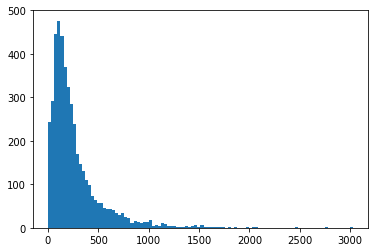

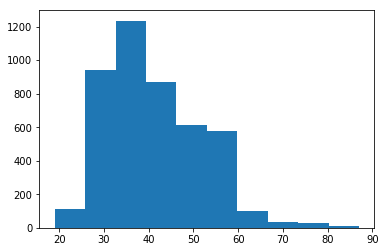

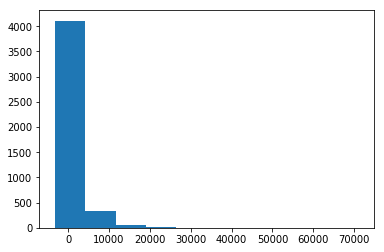

In [3]:
plt.hist((data.duration),bins=100)
plt.show()

plt.hist((data.age),bins=10) 
plt.show()

plt.hist((data.balance),bins=10) 
plt.show()

(3616, 14) (3616,)
(905, 14) (905,)


/opt/conda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Training Confusion Matrix:
  [[1818 1375]
 [ 100  323]]

Testing Confusion Matrix:
  [[438 369]
 [ 24  74]]

Training Accuracy Score:  0.5920907079646017

Testing Accuracy Score:  0.5657458563535912

Training Precision:  0.19022379269729092

Testing Precision:  0.1670428893905192

Training Recall:  0.7635933806146572

Testing Recall:  0.7551020408163265

Train Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.57      0.71      3193
           1       0.19      0.76      0.30       423

   micro avg       0.59      0.59      0.59      3616
   macro avg       0.57      0.67      0.51      3616
weighted avg       0.86      0.59      0.66      3616


Test Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.54      0.69       807
           1       0.17      0.76      0.27        98

   micro avg       0.57      0.57      0.57       905
   macro avg       0.56      0.65  

(      y
 2260  0
 226   0
 2662  0
 1828  0
 766   0
 1367  0
 474   0
 483   0
 2112  0
 2893  0
 950   0
 3992  0
 1471  0
 2500  0
 3298  0
 3567  0
 2193  0
 1918  0
 383   0
 3842  0
 2498  0
 578   0
 3157  0
 2408  0
 2337  0
 764   0
 2551  0
 1945  0
 3111  0
 3290  0
 ...  ..
 4343  0
 4006  0
 2130  0
 4455  0
 3741  0
 3585  0
 3946  0
 2348  0
 203   0
 3733  1
 3162  0
 2063  0
 263   0
 2377  0
 1316  0
 4207  0
 468   0
 3892  0
 430   0
 2526  0
 3342  0
 280   0
 4083  0
 2481  0
 1876  1
 505   0
 2786  0
 1461  0
 1978  0
 504   0
 
 [3616 rows x 1 columns],
 array([1, 0, 0, ..., 0, 0, 1]),
 array([[3.55926497e-01, 6.44073503e-01],
        [8.33849372e-01, 1.66150628e-01],
        [8.64412170e-01, 1.35587830e-01],
        ...,
        [9.79611945e-01, 2.03880553e-02],
        [6.34847405e-01, 3.65152595e-01],
        [4.81139995e-09, 9.99999995e-01]]),
       y
 4365  0
 1505  0
 3454  0
 2152  0
 3578  0
 2871  1
 1031  0
 1098  0
 1912  0
 1484  0
 1704  1
 772  

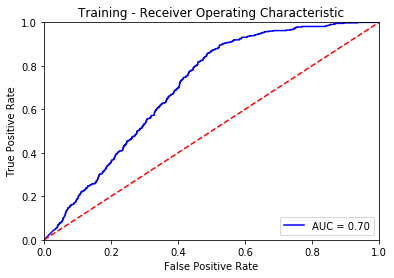

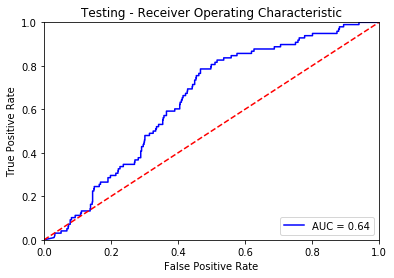

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import numpy as np

from sklearn.neural_network import MLPClassifier 
from sklearn.model_selection import train_test_split

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(data, data.y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

df_train = X_train
df_test = X_test

df_train_class = pd.DataFrame(df_train['y'])    
df_train_features = df_train.loc[:, df_train.columns != 'y']

df_test_class = pd.DataFrame(df_test['y'])
df_test_features = df_test.loc[:, df_test.columns != 'y']

### Multi layer perceptrons

mlp_classifier = MLPClassifier(hidden_layer_sizes=[100,100], batch_size=50,)
mlp_classifier.fit(df_train_features, df_train_class)
                     
predicted_train = mlp_classifier.predict(df_train_features)
predicted_test = mlp_classifier.predict(df_test_features)

predicted_prob_train = mlp_classifier.predict_proba(df_train_features)
predicted_prob_test = mlp_classifier.predict_proba(df_test_features)

evaluate_classifier_performance(df_train_class, predicted_train, predicted_prob_train, df_test_class, predicted_test, predicted_prob_test, 'y')

##################################################################################



